In [118]:
#Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Import Libraries and Data

In [119]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

import numpy as np #Linear Algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score

import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
 
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
% matplotlib inline

from textblob import TextBlob

#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [120]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [121]:
df = pd.read_excel('Comments_Data_Extracts_01.xlsx')

# Data Understanding and Preprocessing

In [122]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  9546 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


(9546, 1)

In [123]:
df.head()

,Comments
0,I just bought this projector and i am clueless how to connect to my iPhone??
1,You promised me a multi card reader for leaving a review I'm still waiting Susie
2,"Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups..."
3,"Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat"
4,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?


In [124]:
# change datatype of 'Comments'
df['Comments'] = df['Comments'].astype(str)

In [125]:
df

,Comments
0,I just bought this projector and i am clueless how to connect to my iPhone??
1,You promised me a multi card reader for leaving a review I'm still waiting Susie
2,"Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups..."
3,"Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat"
4,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?
...,...
9541,Did You see it? 🙈https://t.co/X1b3ZyrGbeLet the fun begin! #Xbox#NintendoSwitch #Playstation https://t.co/uQtSvYtlCh
9542,4inch FHD 1080P DVR camera RecorderWhatsApp/WeChat+86 18332187626#autobrighttech #AutobrightTech #caraccessories #autoaccessories #otoaccessories #vehicleaccessories #carcameras #carcamerarecorder #carcameraJapan… https://t.co/AowMlwkLCN
9543,📷 4inch FHD 1080P DVR camera Recorder WhatsApp/WeChat+86 18332187626 #autobrighttech #AutobrightTech #caraccessories #autoaccessories #otoaccessories #vehicleaccessories #carcameras #carcamerarecorder #carcameraJapan #carcamera2020... https://t.co/i9h3w8CKxz
9544,#autobrighttech #AutobrightTech #caraccessories #autoaccessories #otoaccessories #vehicleaccessories #dvr #dvrcamera #dvr2018 #dvr2019 #dvr2020 #dvrl01 #carcameras #carcamerarecorder #carcameraJapan #carcamera2020… https://t.co/tSTQoGBLNQ


In [126]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [127]:
print(f"Numbers of missing comments = {df['Comments'].isnull().sum()}")

Numbers of missing comments = 0


Spell Correction

In [128]:
# Spell correct using text blob for the first 1000 records
#from textblob import TextBlob
#dfs = df['Comments'][:1000].apply(lambda x: str(TextBlob(x).correct()))

In [129]:
#dfs

Text Preprocessing

In [130]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 9546): # iterate through the list of all 9546 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  df_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',df.Comments[i])
  # convert all words to lower case
  df_cln = df_cln.lower()
  # split sentences into words
  df_cln = df_cln.split()
  # remove English stop words
  df_cln = [x for x in df_cln if not x in stop_words]
  # stem words to the base form
  df_cln = [ps.stem(x) for x in df_cln]
  # join words to form the original sentences
  df_cln = " ".join(df_cln)
  # append to the list to get all Comments in one place
  corpus.append(df_cln)
#print(corpus)

## ------------------------------------------------------------------------------------------------------------------------------------- ##

# VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Analysis

In [131]:
from pandas import DataFrame
df_clean = DataFrame (corpus,columns=['comments'])

In [132]:
pip install vaderSentiment

In [133]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [134]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [135]:
df_clean_new = df_clean.comments[0:5]

In [136]:
#general imports
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import os # accessing directory structure

#NLP processing imports
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import spacy

###Vader Sentiment
#To install vaderSentiment
!pip install vaderSentiment 
from vaderSentiment import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

####Lemmatization
from nltk.stem import WordNetLemmatizer
# Lemmatize with POS Tag
from nltk.corpus import wordnet

In [137]:
data = pd.read_excel('Comments_Data_Extracts_01.xlsx')

In [138]:
data.shape

(9546, 1)

In [139]:
data = data.loc[:10000]

In [140]:
data.shape

(9546, 1)

In [141]:
data.head()

,Comments
0,I just bought this projector and i am clueless how to connect to my iPhone??
1,You promised me a multi card reader for leaving a review I'm still waiting Susie
2,"Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups..."
3,"Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat"
4,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?


In [142]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [143]:
data.head(10)

,Comments
0,I just bought this projector and i am clueless how to connect to my iPhone??
1,You promised me a multi card reader for leaving a review I'm still waiting Susie
2,"Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups..."
3,"Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat"
4,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?
5,Possible to try?
6,Price?
7,Terrible company and product from china
8,"should say...Hidden Design, not Hidded"
9,Hello i have a camera apeman a70. What is the app to use wifi?


In [144]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 9546 rows and 1 columns


In [145]:
#DataTypes
data.dtypes

Comments    object
dtype: object

In [146]:
data["Comments"] = data["Comments"].astype(str)

Remove URLs

In [147]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)

In [148]:
data["commentclean"] = data["Comments"].apply(lambda text: remove_urls(text))

In [149]:
data.head()

,Comments,commentclean
0,I just bought this projector and i am clueless how to connect to my iPhone??,I just bought this projector and i am clueless how to connect to my iPhone??
1,You promised me a multi card reader for leaving a review I'm still waiting Susie,You promised me a multi card reader for leaving a review I'm still waiting Susie
2,"Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups...","Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups..."
3,"Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat","Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat"
4,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?


Find out the top 100 words which are getting used in the text of the data

In [150]:
top_N = 100 #top 100 words

#convert list of list into text
a = data['commentclean'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [151]:
#remove all the stopwords from the text
stop_words = set(stopwords.words('english'))    
nltk_words = list(stopwords.words('english'))   

In [152]:
nltk.download('punkt')
word_tokens = word_tokenize(b) # Tokenization
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [153]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

Lemmatization

In [154]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

In [155]:
nltk.download('averaged_perceptron_tagger')
lemmatized_output = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in cleaned_data_title]
lemmatized_output = [word for word in lemmatized_output if not word.isnumeric()]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Frequency Distribution

In [156]:
word_dist = nltk.FreqDist(lemmatized_output)
top100_words = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

<Figure size 720x720 with 0 Axes>

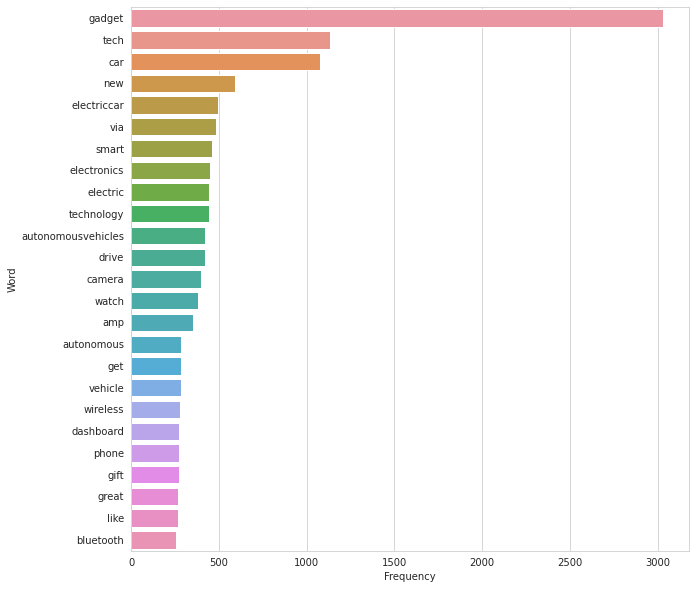

In [157]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(25))

WordCloud

In [158]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (80,80))
    wc = WordCloud(background_color = 'black', max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

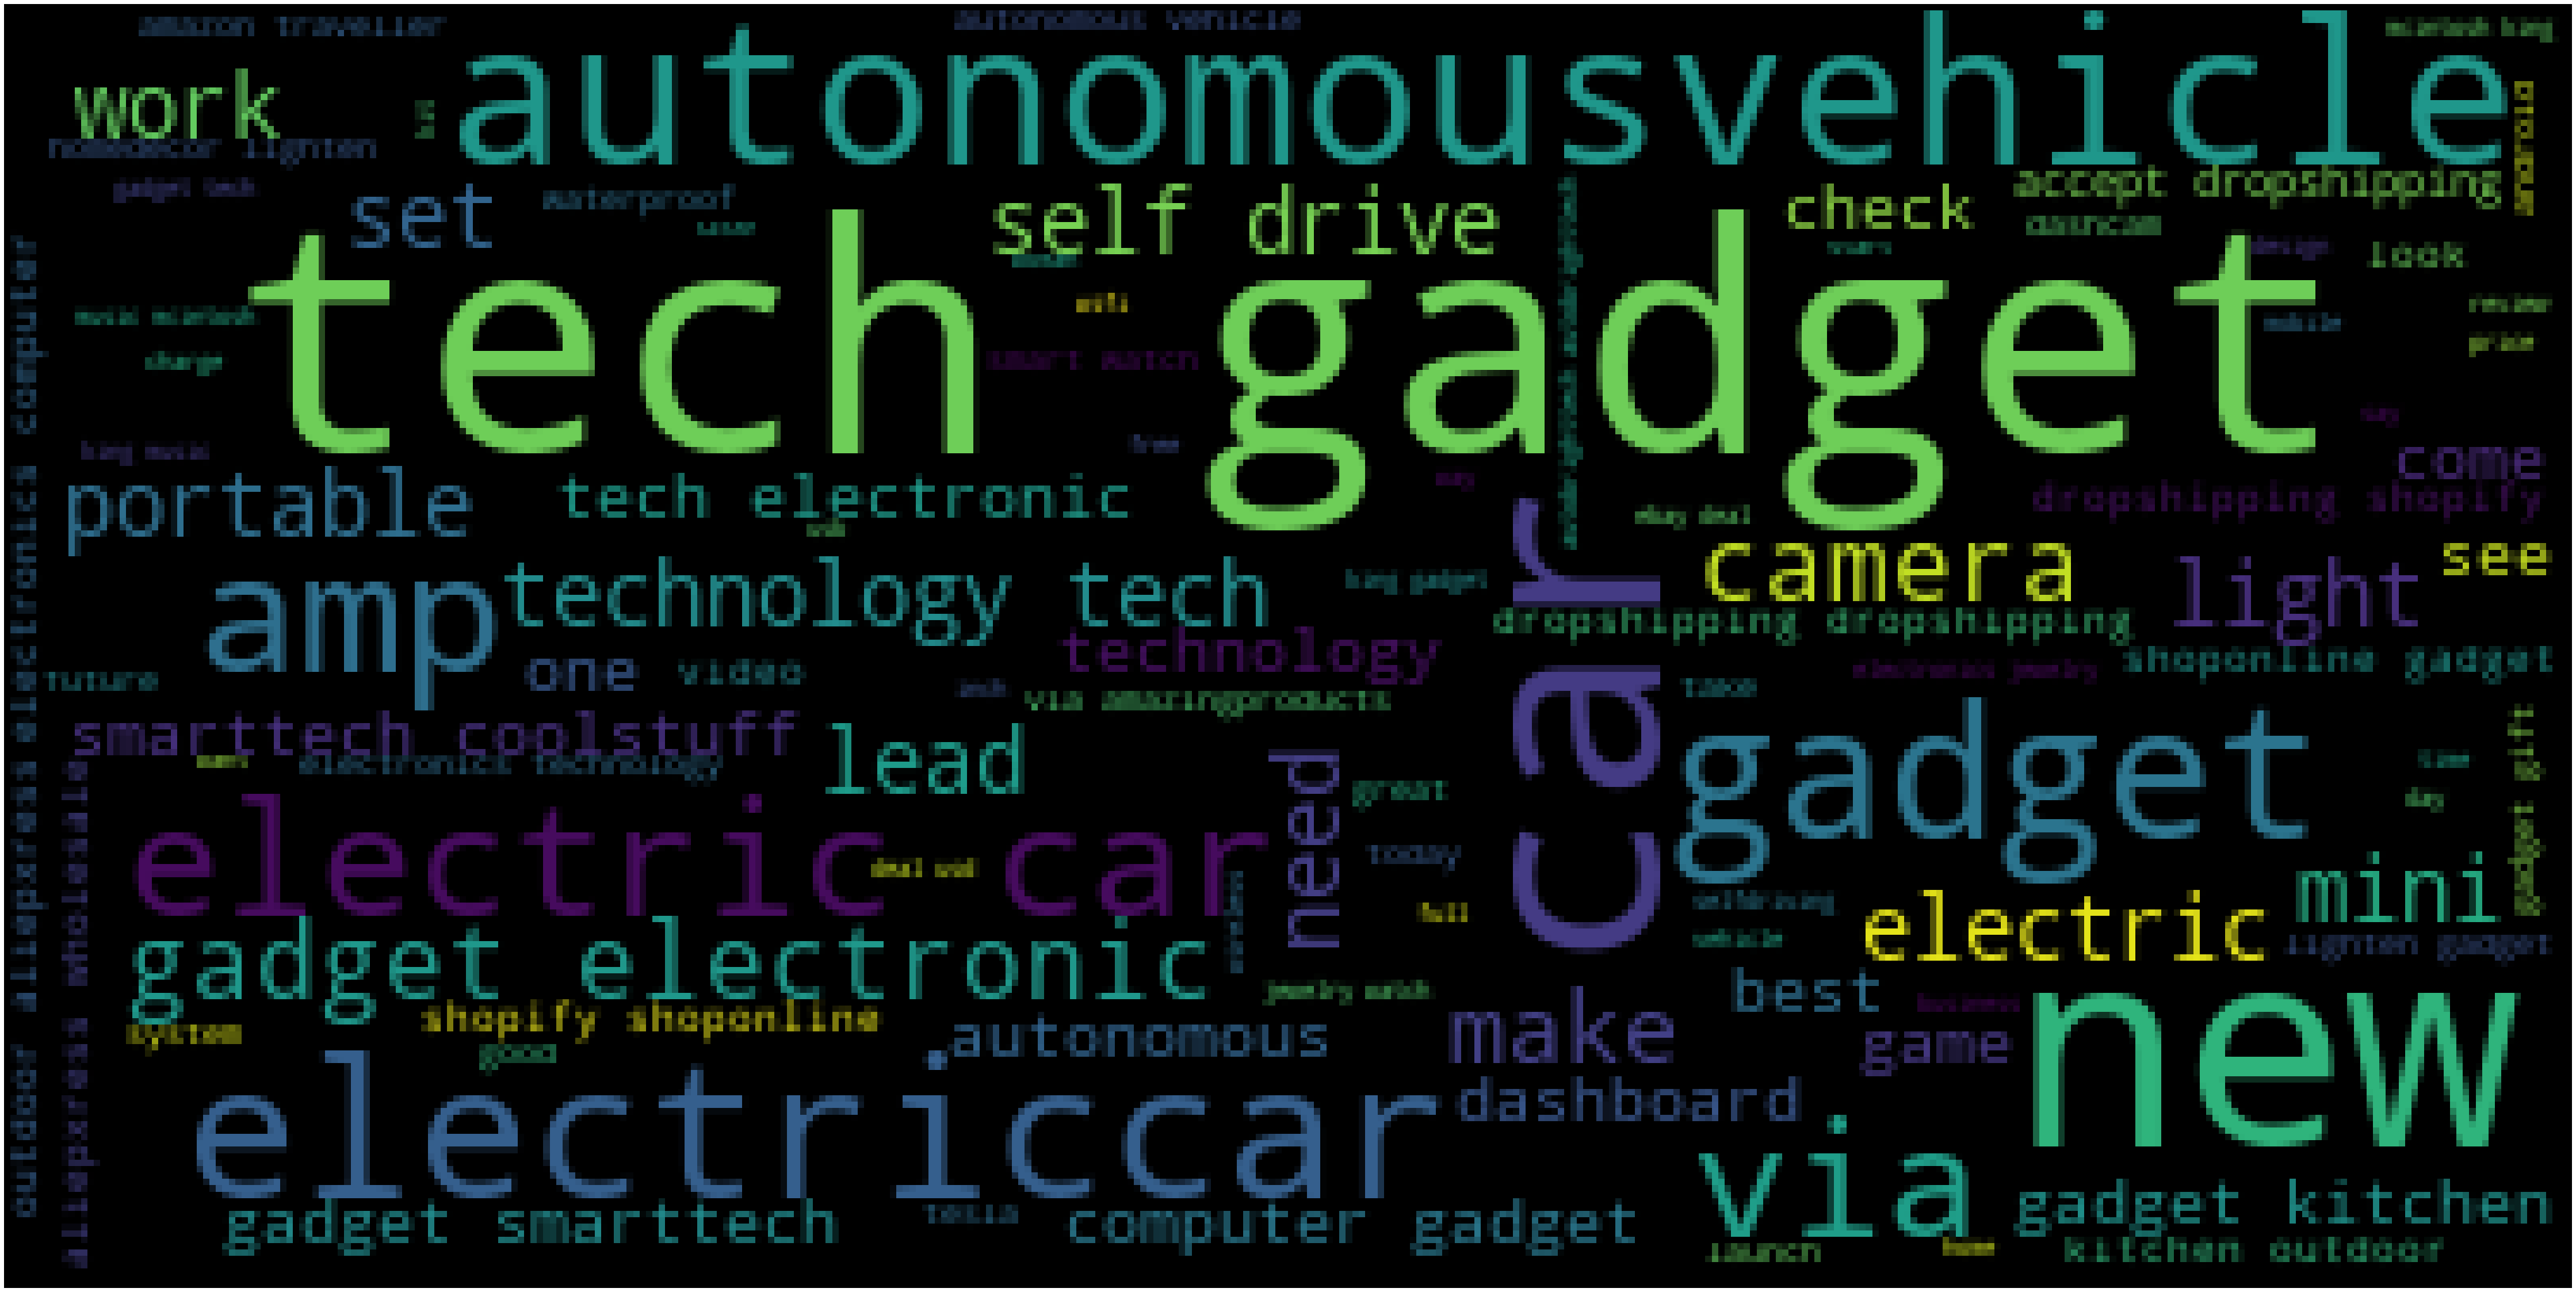

In [159]:
wc(lemmatized_output,'black','Common Words' )

VADER & Textblob Sentiment Analysis

In [160]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [161]:
data["Polarity"] = data["commentclean"].apply(sentiment)

In [162]:
data.head()

,Comments,commentclean,Polarity
0,I just bought this projector and i am clueless how to connect to my iPhone??,I just bought this projector and i am clueless how to connect to my iPhone??,-0.4329
1,You promised me a multi card reader for leaving a review I'm still waiting Susie,You promised me a multi card reader for leaving a review I'm still waiting Susie,0.3612
2,"Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups...","Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups...",0.0000
3,"Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat","Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat",0.8630
4,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?,0.0000


In [163]:
data.dtypes

Comments        object 
commentclean    object 
Polarity        float64
dtype: object

In [164]:
data.groupby('Polarity').size()

Polarity
-0.9694    1
-0.8788    1
-0.8625    2
-0.8519    2
-0.8442    1
          ..
 0.9485    1
 0.9566    2
 0.9571    1
 0.9607    1
 0.9618    1
Length: 698, dtype: int64

In [165]:
def senti(data):
    if data['Polarity'] >= 0.15:
        val = "Positive"
    #elif data['Polarity'] <= -0.25:
        #val = "Negative"
    else:
        val = "Negative"
    return val

In [166]:
data['Sentiment'] = data.apply(senti, axis=1)

<Figure size 720x720 with 0 Axes>

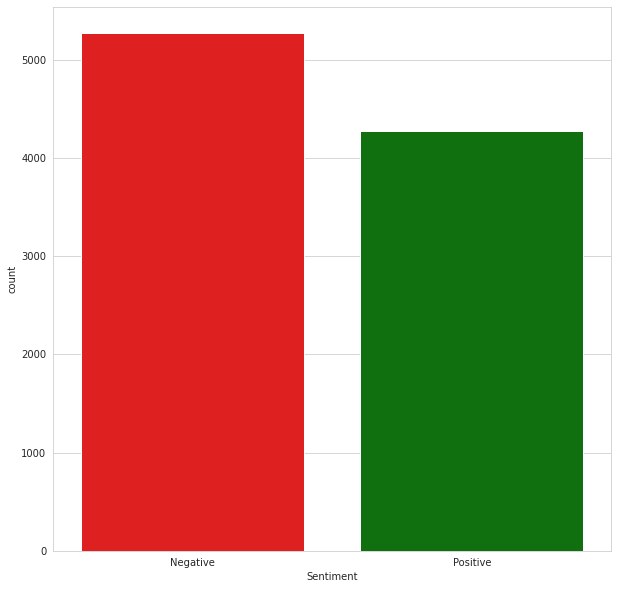

In [167]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment", data=data, 
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))

In [168]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Polarity_Category_VADER.xlsx')
data.to_excel(writer,'Sheet1',index=False)
writer.save()

In [169]:
#convert Polaty_type Negative, and Positive to 0, 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [170]:
le.fit(data['Sentiment'])

LabelEncoder()

In [171]:
list(le.classes_)

['Negative', 'Positive']

In [172]:
dfn = le.transform(data['Sentiment'])

In [173]:
le.inverse_transform([0,1])

array(['Negative', 'Positive'], dtype=object)

In [174]:
data['Polarity'] = dfn
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comments      9546 non-null   object
 1   commentclean  9546 non-null   object
 2   Polarity      9546 non-null   int64 
 3   Sentiment     9546 non-null   object
dtypes: int64(1), object(3)
memory usage: 298.4+ KB


Index(['Comments', 'commentclean', 'Polarity', 'Sentiment'], dtype='object')

In [175]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 9546): # iterate through the list of all 9546 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  dfn_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',data.Comments[i])
  # convert all words to lower case
  dfn_cln = dfn_cln.lower()
  # split sentences into words
  dfn_cln = dfn_cln.split()
  # remove English stop words
  dfn_cln = [x for x in df_cln if not x in stop_words]
  # stem words to the base form
  dfn_cln = [ps.stem(x) for x in df_cln]
  # join words to form the original sentences
  dfn_cln = " ".join(dfn_cln)
  # append to the list to get all Comments in one place
  corpus.append(df_cln)
#print(corpus)

In [176]:
data[0:5]

,Comments,commentclean,Polarity,Sentiment
0,I just bought this projector and i am clueless how to connect to my iPhone??,I just bought this projector and i am clueless how to connect to my iPhone??,0,Negative
1,You promised me a multi card reader for leaving a review I'm still waiting Susie,You promised me a multi card reader for leaving a review I'm still waiting Susie,1,Positive
2,"Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups...","Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups...",0,Negative
3,"Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat","Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat",1,Positive
4,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?,0,Negative


In [177]:
def clean_comment_length(Comments):
    letters_only = re.sub("[^a-zA-Z]", " ",Comments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [178]:
def comment_to_words(Comments):
    letters_only = re.sub("[^a-zA-Z]", " ",Comments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [179]:
data['clean_comment']=data['Comments'].apply(lambda x: comment_to_words(x))
data['comment_length']=data['Comments'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(data,test_size=0.25,random_state=42)

In [180]:
train_clean_comment=[]
for comment in train['clean_comment']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['clean_comment']:
    test_clean_comment.append(comment)

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [183]:
#Classifiers
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),GaussianNB()]

Accuracy of SVC is 0.5592794302471722
              precision    recall  f1-score   support

    Negative       1.00      0.55      0.71      2353
    Positive       0.03      1.00      0.06        34

    accuracy                           0.56      2387
   macro avg       0.52      0.78      0.39      2387
weighted avg       0.99      0.56      0.70      2387



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb59d23780>)

([<matplotlib.axis.XTick at 0x7fdb5acc0828>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fdb58bae198>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

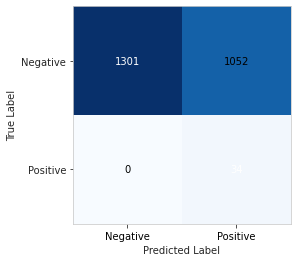

Accuracy of DecisionTreeClassifier is 0.8902387934645999
              precision    recall  f1-score   support

    Negative       0.92      0.89      0.90      1345
    Positive       0.86      0.90      0.88      1042

    accuracy                           0.89      2387
   macro avg       0.89      0.89      0.89      2387
weighted avg       0.89      0.89      0.89      2387



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb5aee2780>)

([<matplotlib.axis.XTick at 0x7fdb5643f828>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fdb58b9a2e8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

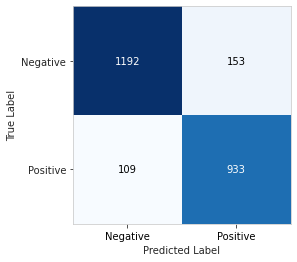

Accuracy of RandomForestClassifier is 0.8789275240888144
              precision    recall  f1-score   support

    Negative       0.95      0.85      0.89      1448
    Positive       0.80      0.92      0.86       939

    accuracy                           0.88      2387
   macro avg       0.87      0.89      0.88      2387
weighted avg       0.89      0.88      0.88      2387



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb610889e8>)

([<matplotlib.axis.XTick at 0x7fdb5a593908>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fdb59d236d8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

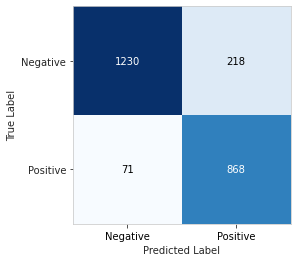

Accuracy of GradientBoostingClassifier is 0.8098031001256808
              precision    recall  f1-score   support

    Negative       0.97      0.75      0.85      1671
    Positive       0.62      0.94      0.75       716

    accuracy                           0.81      2387
   macro avg       0.79      0.85      0.80      2387
weighted avg       0.86      0.81      0.82      2387



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb59d64b38>)

([<matplotlib.axis.XTick at 0x7fdb59d80be0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fdb5616c9b0>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

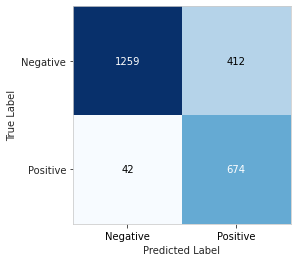

Accuracy of GaussianNB is 0.6527021365731043
              precision    recall  f1-score   support

    Negative       0.51      0.78      0.61       848
    Positive       0.83      0.58      0.68      1539

    accuracy                           0.65      2387
   macro avg       0.67      0.68      0.65      2387
weighted avg       0.71      0.65      0.66      2387



<Figure size 432x288 with 0 Axes>

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb5af114e0>)

([<matplotlib.axis.XTick at 0x7fdb59829828>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

([<matplotlib.axis.YTick at 0x7fdb61088eb8>,
 [Text(0, 0, 'Negative'), Text(0, 0, 'Positive')])

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

<Figure size 432x288 with 0 Axes>

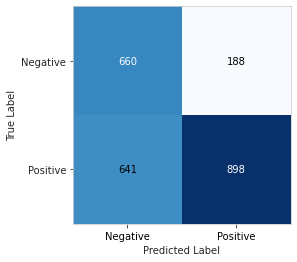

In [184]:
from sklearn.metrics import classification_report
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Sentiment'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Sentiment']))
    
    #Confusion Matrix
    cm = confusion_matrix(pred,test['Sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Negative','Positive'],color='black')
    plt.yticks(range(2), ['Negative','Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x7fdb60f5a630>,
 [Text(0, 0, 'SVC'),
  Text(0, 0, 'DecisionTreeClassifier'),
  Text(0, 0, 'RandomForestClassifier'),
  Text(0, 0, 'GradientBoostingClassifier'),
  Text(0, 0, 'GaussianNB')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

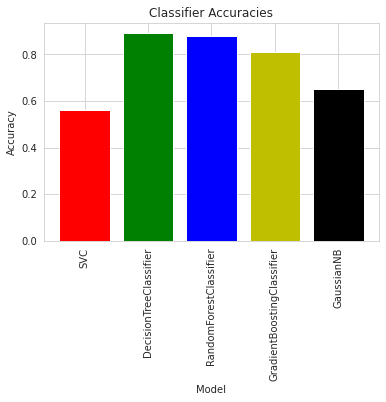

In [185]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')

# Aspect / Opinion Mining

In [186]:
#import spacy
nlp = spacy.load("en_core_web_sm")

In [187]:
def pos(text):
    doc = nlp(text)
    # You want list of Verb tokens 
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [188]:
data["Aspects"] = data["commentclean"].apply(pos)

In [189]:
data.head()

,Comments,commentclean,Polarity,Sentiment,clean_comment,comment_length,Aspects
0,I just bought this projector and i am clueless how to connect to my iPhone??,I just bought this projector and i am clueless how to connect to my iPhone??,0,Negative,bought projector clueless connect iphone,5,"[projector, clueless]"
1,You promised me a multi card reader for leaving a review I'm still waiting Susie,You promised me a multi card reader for leaving a review I'm still waiting Susie,1,Positive,promised multi card reader leaving review still waiting susie,9,"[card, reader, review]"
2,"Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups...","Hello Apeman, your team is not responding to my email or fixing the issue after multiple follow ups...",0,Negative,hello apeman team responding email fixing issue multiple follow ups,10,"[team, email, issue, follow, ups]"
3,"Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat","Great picture, I am so excited about looking for my own 4k camera,just need the price to come down a little looking forward to future adventures with running & a camera #TheJogShop #Brighton #247running#Runpals #puresportsperformace #ukrunchat",1,Positive,great picture excited looking k camera need price come little looking forward future adventures running camera thejogshop brighton running runpals puresportsperformace ukrunchat,22,"[picture, 4k, camera, price, adventures, running, camera, puresportsperformace, #]"
4,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?,I have just bought the Apeman 550 dashcam and find the rear camer cable is 1 metre too short. Has anyone got any ideas where I can get a short extension?,0,Negative,bought apeman dashcam find rear camer cable metre short anyone got ideas get short extension,15,"[dashcam, camer, cable, ideas, extension]"


In [190]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [191]:
## https://www.kaggle.com/manovirat/aspect-based-sentiment-analysis